## Taller 2

### Punto 2

Referencias del texto: https://www.maths.ed.ac.uk/~ateckent/vacation_reports/Summer%20Project%20Final.pdf

In [1]:
#Lirerias importantes

import random
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
from numpy import math
from matplotlib import pyplot as plt

In [ ]:
#Vamos a generar el camino geometrico 
#Usando el modelo B-S

def geometric(mu, sigma, t, S0):
    path = np.zeros(len(t))


### Punto 3

In [14]:
import random
import numpy as np
import scipy
import datetime
from scipy import stats
from scipy.stats import norm
from numpy import math
import yfinance as yf
import arch
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

In [8]:
#we download the dataset of the price actions of META
start = datetime.datetime(2012, 10, 13)
end = datetime.datetime(2022, 10, 13)

ticker = yf.download('META', start = start, end = end, interval='1d')

[*********************100%***********************]  1 of 1 completed


We get the returns

<AxesSubplot: xlabel='Date'>

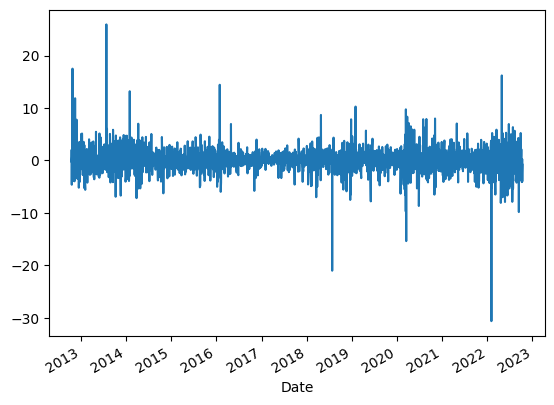

In [16]:
meta_rets = np.log(ticker['Adj Close']).diff().dropna()*100 #consecutive diff
meta_rets2 = meta_rets**2
meta_rets.plot()

We see the Autocorrelation

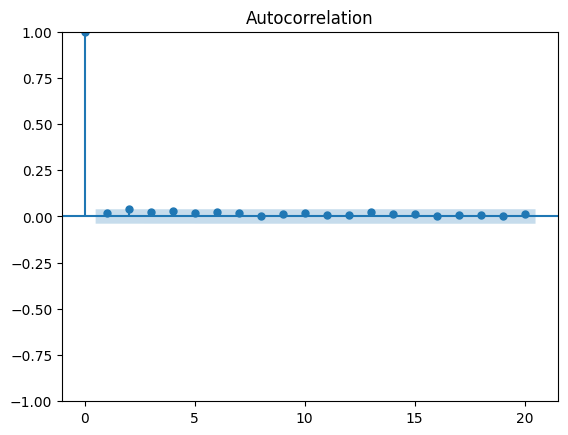

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


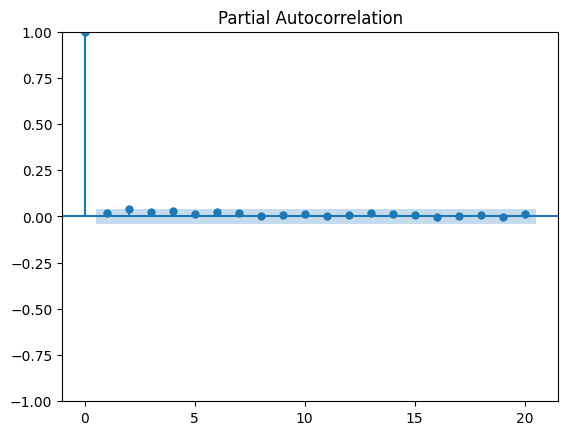

In [17]:
plot_acf(meta_rets2, lags = 20)
plt.show()
plot_pacf(meta_rets2, lags = 20)
plt.show()

In [19]:
from arch import arch_model
am = arch_model(meta_rets, p=1, o=0, q=1)
meta_model = am.fit()
print(meta_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 15973.208039602083
Iteration:      2,   Func. Count:     17,   Neg. LLF: 819912158.3524007
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6118.966905238436
Iteration:      4,   Func. Count:     31,   Neg. LLF: 6196.648464948283
Iteration:      5,   Func. Count:     37,   Neg. LLF: 6532.743293832819
Iteration:      6,   Func. Count:     43,   Neg. LLF: 107117478927.32996
Iteration:      7,   Func. Count:     51,   Neg. LLF: 33415.63981143116
Iteration:      8,   Func. Count:     61,   Neg. LLF: 5619.7301356642665
Iteration:      9,   Func. Count:     67,   Neg. LLF: 5619.7667225974765
Iteration:     10,   Func. Count:     73,   Neg. LLF: 5617.301470599155
Iteration:     11,   Func. Count:     79,   Neg. LLF: 5627.651769956161
Iteration:     12,   Func. Count:     85,   Neg. LLF: 5594.8873567548035
Iteration:     13,   Func. Count:     90,   Neg. LLF: 10349.984928232447
Iteration:     14,   Func. Count:     99,   Neg. LLF: 5596